In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [8]:
uniswap = pd.read_csv('sim/results/uniswap.csv')
winsorizing = pd.read_csv('sim/results/winsorizing.csv')
median = pd.read_csv('sim/results/median.csv')

TypeError: unhashable type: 'numpy.ndarray'

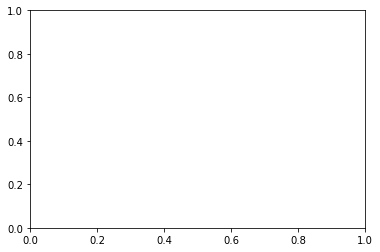

In [4]:
plt.plot(uniswap)
plt.show()

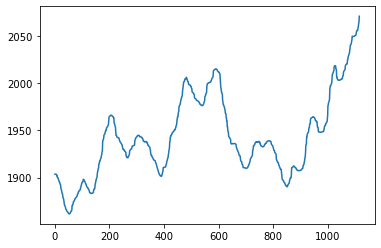

In [18]:
plt.plot(uniswap.iloc[:, 5])
plt.show()

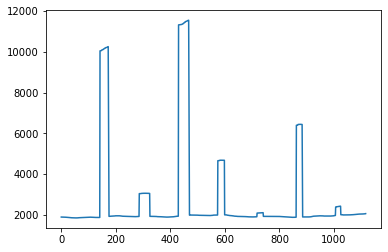

In [17]:
plt.plot(winsorizing.iloc[:, 5])
plt.show()

In [21]:
index = 0
while index < 1100:
    if winsorizing.iloc[index, 5] > 2200:
        print(index)
    index += 1

142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024


In [16]:
median.iloc[:, 5]

0       1903.643716
1       1903.453371
2       1903.453371
3       1903.453371
4       1903.453371
           ...     
1112    2058.887679
1113    2060.741419
1114    2062.390589
1115    2064.660354
1116    2070.863324
Name: 1903.6437162073432.1, Length: 1117, dtype: float64

In [28]:
uniswap_csv = pd.read_csv('uniswap-winsorize.csv')
winsorize_csv = pd.read_csv('winsorize-winsorize.csv')

In [29]:
uniswap_oracle = list(uniswap_csv.iloc[:, 5])
winsorize_oracle = list(winsorize_csv.iloc[:, 5])
trade = list(uniswap_csv.iloc[:, 6])

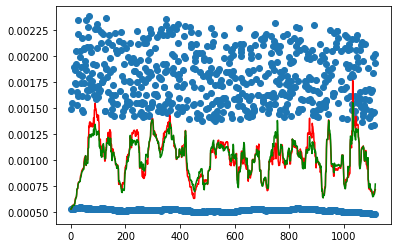

In [30]:
plt.scatter(range(len(trade)), trade)
plt.plot(uniswap_oracle, color='red')
plt.plot(winsorize_oracle, color='green')
plt.show()

In [35]:
np.mean([i for i in trade if i < 0.00075])

0.0005139709123671187

In [36]:
trade_new = []

for item in trade:
    if item < 0.00075:
        trade_new.append(item)
    else:
        trade_new.append(0.0005139709123671187)

In [42]:
i = 0
uniswap_sum = 0
winsorize_sum = 0
while i < len(trade_new):
    uniswap_sum += abs(trade_new[i] - uniswap_oracle[i])
    winsorize_sum += abs(trade_new[i] - winsorize_oracle[i])
    i += 1

uniswap_sum /= len(uniswap_oracle)
winsorize_sum /= len(winsorize_oracle)

In [43]:
uniswap_sum

0.0005064653161097566

In [44]:
winsorize_sum

0.0005013070959055711

In [45]:
winsorize_sum / uniswap_sum

0.9898152547862376

In [75]:
uniswap_csv = pd.read_csv('uniswap-attack.csv')
winsorize_csv = pd.read_csv('winsorize-attack.csv')

In [76]:
uniswap_oracle = list(uniswap_csv.iloc[:, 5])
winsorize_oracle = list(winsorize_csv.iloc[:, 5])
trade = list(uniswap_csv.iloc[:, 6])

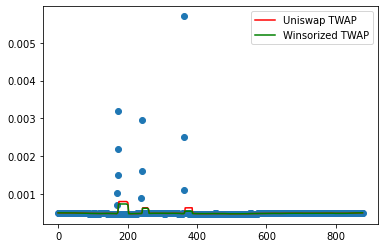

In [79]:
plt.scatter(range(len(trade)), trade)
plt.plot(uniswap_oracle, color='red', label='Uniswap TWAP')
plt.plot(winsorize_oracle, color='green', label='Winsorized TWAP')
plt.legend()
plt.show()

In [80]:
np.mean([i for i in trade if i < 0.0006])

0.00048177181144920566

In [81]:
trade_new = []

for item in trade:
    if item < 0.0006:
        trade_new.append(item)
    else:
        trade_new.append(0.00048177181144920566)

In [82]:
i = 0
uniswap_sum = 0
winsorize_sum = 0
while i < len(trade_new):
    uniswap_sum += abs(trade_new[i] - uniswap_oracle[i])
    winsorize_sum += abs(trade_new[i] - winsorize_oracle[i])
    i += 1

uniswap_sum /= len(uniswap_oracle)
winsorize_sum /= len(winsorize_oracle)

In [83]:
uniswap_sum

1.962496010489414e-05

In [84]:
winsorize_sum

1.493817364509256e-05

In [85]:
winsorize_sum / uniswap_sum

0.7611823700659257

In [57]:
median_original = pd.read_csv('median-original.csv')
median_modified = pd.read_csv('median-modified.csv')

In [68]:
sum(median_original.iloc[:, 8])

210979978

In [69]:
sum(median_modified.iloc[:, 8])

7050360

In [70]:
sum(median_modified.iloc[:, 8]) / sum(median_original.iloc[:, 8])

0.03341719942733144